# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I. In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I of the Lab.   

## Task - 1

In [ ]:
from os import environ as env
import keystoneclient.v3.client as ksclient

To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [ ]:
keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

In [ ]:
endpoints = keystone.service_catalog.get_endpoints()

In [ ]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public':
            print 'service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url']

## Questions:

In [ ]:
1 - Explain the working of the code?
    Before running the code I also sourced the .sh file so the keystone client could get my credentials. Next 
    we are calling on the get_endpoints() method which returns a dictionary containing the endpoints of the service.
    Then we are loooking inside the endpoint dictionary to find the endpoints with public interfaces if they are public 
    they are then printed out.
    
2 - Why we need openrc file to run this code?
    This code requires multiple environmental constants. They are fetched using the openrc file.
    
3 - The code shows information about the "public" endpoints. Modify the code to show both the "public" and "internal" endpoints?
    We can change this line 
    if edp['interface'] == 'public'
    to
    if edp['interface'] == 'public' or edp['interface'] == 'internal'
    
4 - What is the difference between "internal" and "public" endpoints?
    internal endpoints are not reachable from outside the internal network. Anyone can reach the public endpoints.

# My code for Task 1

In [ ]:
from os import environ as env 
import keystoneclient.v3.client as ksclient

keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

endpoints = keystone.service_catalog.get_endpoints()
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public' or edp['interface'] == 'internal':
                if edp['interface'] == 'internal':
                        print 'service: ', endpoint, ', region: ', edp['region'], ', internal endpoint: ', edp['url']
                else:
                        print 'service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url']



# Output Code

In [ ]:
service:  compute , region:  HPC2N , internal endpoint:  http://172.16.2.1:8774/v2.1/ad5091c4f42e4defb98eb9550f875f4f
service:  compute , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:8774/v2.1/ad5091c4f42e4defb98eb9550f875f4f
service:  network , region:  HPC2N , internal endpoint:  http://172.16.2.1:9696
service:  network , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:9696
service:  volumev2 , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:8776/v2/ad5091c4f42e4defb98eb9550f875f4f
service:  volumev2 , region:  HPC2N , internal endpoint:  http://172.16.2.1:8776/v2/ad5091c4f42e4defb98eb9550f875f4f
service:  metric , region:  HPC2N , internal endpoint:  http://172.16.2.1:8041
service:  metric , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:8041
service:  metering , region:  HPC2N , internal endpoint:  http://172.16.2.1:8777
service:  metering , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:8777
service:  cloudformation , region:  HPC2N , internal endpoint:  http://172.16.2.1:8000/v1
service:  cloudformation , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:8000/v1
service:  volume , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:8776/v1/ad5091c4f42e4defb98eb9550f875f4f
service:  volume , region:  HPC2N , internal endpoint:  http://172.16.2.1:8776/v1/ad5091c4f42e4defb98eb9550f875f4f
service:  orchestration , region:  HPC2N , internal endpoint:  http://172.16.2.1:8004/v1/ad5091c4f42e4defb98eb9550f875f4f
service:  orchestration , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:8004/v1/ad5091c4f42e4defb98eb9550f875f4f
service:  image , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:9292
service:  image , region:  HPC2N , internal endpoint:  http://172.16.2.1:9292
service:  identity , region:  HPC2N , public endpoint:  https://hpc2n.cloud.snic.se:5000/v3
service:  identity , region:  HPC2N , internal endpoint:  http://172.16.2.1:5000/v3


## Task - 2

# My code for Task 2

In [ ]:
from keystoneauth1 import loading
from keystoneauth1 import session
from novaclient import client
from os import environ as env

loader = loading.get_plugin_loader('password')

auth = loader.load_from_options(auth_url=env['OS_AUTH_URL'],
                                username=env['OS_USERNAME'],
                                password=env['OS_PASSWORD'],
                                project_id=env['OS_PROJECT_ID'],
                                project_domain_name=env['OS_USER_DOMAIN_NAME'],
                                user_domain_name=env['OS_USER_DOMAIN_NAME'],
                                )

sess = session.Session(auth=auth)

nova = client.Client("2", session=sess)

servers =  nova.servers.list()
for s in servers:
        print s


# Output code 

In [ ]:
<Server: Tony VM>
<Server: rg2>
<Server: STdeletesoon>
<Server: accnote>
<Server: lab2st>
<Server: husses>
<Server: ismatLab3>
<Server: vm1>
<Server: DeleteIn1Day>
<Server: vm1>
<Server: richard_madl>
<Server: julia_lab3>
<Server: nelsson_lab3>
<Server: vm1>
<Server: Elin_instance_lab3>
... "there were more than these"


## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several times to gather statistic and plot a) A estimated distribution of the time taken (in wall clock) to write and read a file of size 10MB in your volume and b) vary the size of the file from 10kB to 100MB and plot the read and write throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting graphs and a description of your experiment in the report.

Populating the interactive namespace from numpy and matplotlib


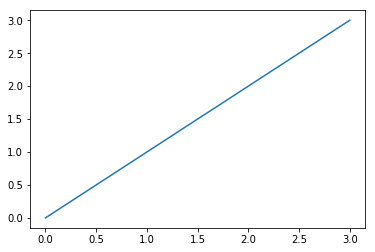

In [9]:
# Implement you solution here. Hint, the following command
%pylab inline 
# (a)
#writing a 10MB file
write_times = [0.016, 0.015, 0.015, 0.015, 0.015, 0.019, 0.022, 0.017, 0.016, 0.017, 0.020, 0.017, 0.018, 0.023, 0.019,
               0.014, 0.011, 0.017, 0.016, 0.016]
#reading a 10MB file
read_times = [0.014, 0.016, 0.015, 0.016, 0.017, 0.018, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.017, 0.016, 0.016, 0.016
             , 0.015, 0.016, 0.018, 0.016]
# will  make matplotlib/pylab available and plots will be displayed directly in the notebook, for example
plt.plot([0,1,2,3],[0,1,2,3])

Don't foget to terminate resources after your experiments. 

In [ ]:
# Clean up volumes